# 1 - Business Understanding

This project aims to segment customers of an e-commerce store into distinct groups based on their purchasing behavior, using clustering techniques. This segmentation helps the business tailor marketing strategies for different customer profiles.<br>Understanding customer segments is crucial for personalized marketing. By clustering customers based on their behavior, the business can create targeted campaigns and optimize customer engagement.

In [573]:
#Libraries 

#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#Método de Kelbow
from yellowbrick.cluster import kelbow_visualizer

#Clustering Models
from sklearn.cluster import KMeans

#Clustering Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [574]:
df = pd.read_csv("../data/data.csv", encoding="ISO-8859-1")

In [575]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 2 - Data Understanding

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [577]:
# Verifying duplicated rows
df.duplicated().sum()

np.int64(5268)

There is 5268 rows duplicated in this dataset that will be deleted.

In [578]:
# Checking missing values

columns = df.columns

for col in columns:
    missing_values = df[col].isnull().sum()/df.shape[0]*100
    print(f'Percentage of missing values in {col}: {missing_values:.2f} %')

Percentage of missing values in InvoiceNo: 0.00 %
Percentage of missing values in StockCode: 0.00 %
Percentage of missing values in Description: 0.27 %
Percentage of missing values in Quantity: 0.00 %
Percentage of missing values in InvoiceDate: 0.00 %
Percentage of missing values in UnitPrice: 0.00 %
Percentage of missing values in CustomerID: 24.93 %
Percentage of missing values in Country: 0.00 %


There are almost 25% of the customer data missing values, these data will be deleted.

## EDA (Exploratory Data Analysis)

### Numerical Features

In [579]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Boxplot

<Axes: >

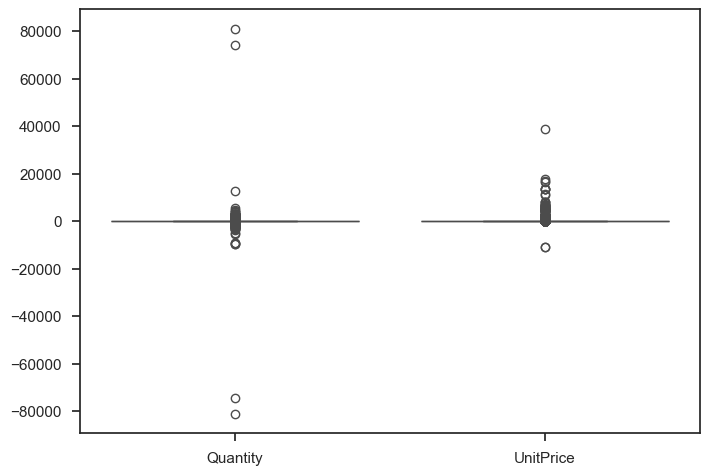

In [580]:
sns.boxplot(data=df[['Quantity','UnitPrice']])

Outliers and negative values in Quantity and UnitPrice

Categorical Columns

In [581]:
country = df['Country'].value_counts()
country_df = country.reset_index()
country_df.columns = ['Country', 'Count']
country_df['Percent'] = country_df['Count']/sum(country_df['Count'])*100

In [582]:
country_df

,Country,Count,Percent
0,United Kingdom,495478,91.431956
1,Germany,9495,1.752139
2,France,8557,1.579047
3,EIRE,8196,1.512431
4,Spain,2533,0.467422
5,Netherlands,2371,0.437527
6,Belgium,2069,0.381798
7,Switzerland,2002,0.369435
8,Portugal,1519,0.280305
9,Australia,1259,0.232327


C:\Users\marti\AppData\Local\Temp\ipykernel_27848\4042776645.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




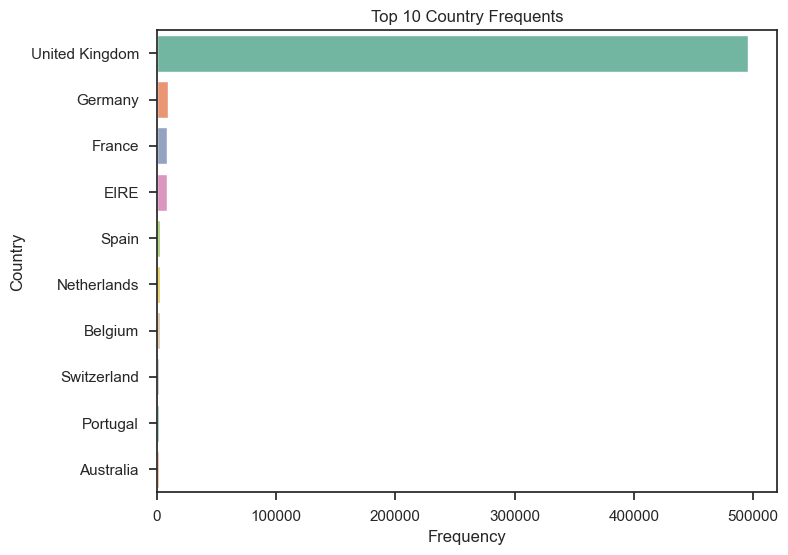

In [583]:
#TOP COUNTRY FREQUENCIES
top_10 = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_10.values, y=top_10.index, palette="Set2")
plt.title('Top 10 Country Frequents')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

# 3 - Data Preparation

## Data Cleaning

Steps:
1. Delete duplicated values
2. Delete missing values
3. Change InvoiceDate datatype to datetime
4. Change CustomerID datatype to object
5. Remove negative values from Quantity and UnitPrice
6. Remove Outliers from Quantity and UnitPrice

In [584]:
# 1. Delete duplicated values
df_clean = df.drop_duplicates()

In [585]:
df_clean.duplicated().sum()

np.int64(0)

In [586]:
# 2. Delete missing values
df_clean = df.dropna()

In [587]:
df_clean.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [588]:
# 3. Change InvoiceDate datatype to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

C:\Users\marti\AppData\Local\Temp\ipykernel_27848\3022752973.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [589]:
df_clean['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [590]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [591]:
df_clean['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [592]:
# 4. Change CustomerID datatype to object
df_clean['CustomerID']= df['CustomerID'].astype(str).replace(r'\.0$', '', regex=True)
df_clean.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_27848\1614593113.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [593]:
# 5. Remove negative values from Quantity and UnitPrice
df_clean = df_clean[(df['Quantity']>0)&(df['UnitPrice']>0)]

C:\Users\marti\AppData\Local\Temp\ipykernel_27848\2184763167.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [594]:
# 6. Remove Outliers from Quantity and UnitPrice

<Axes: >

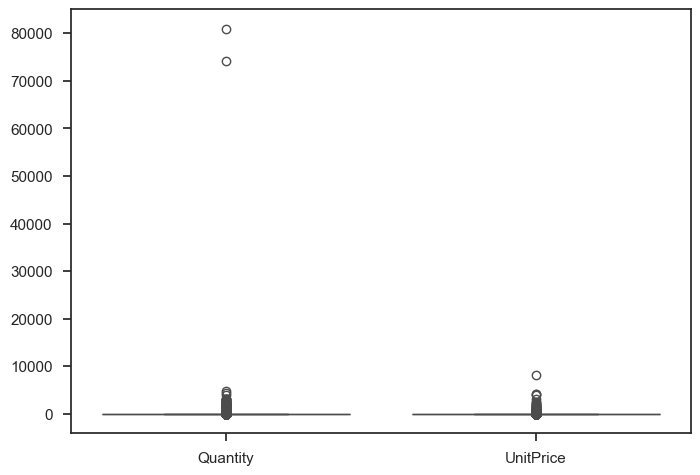

In [595]:
sns.boxplot(data=df_clean[['Quantity','UnitPrice']])

In [596]:
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    
    for col in columns:
        if col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

In [597]:
df_clean = remove_outliers_iqr(df_clean, ['Quantity', 'UnitPrice'])

<Axes: >

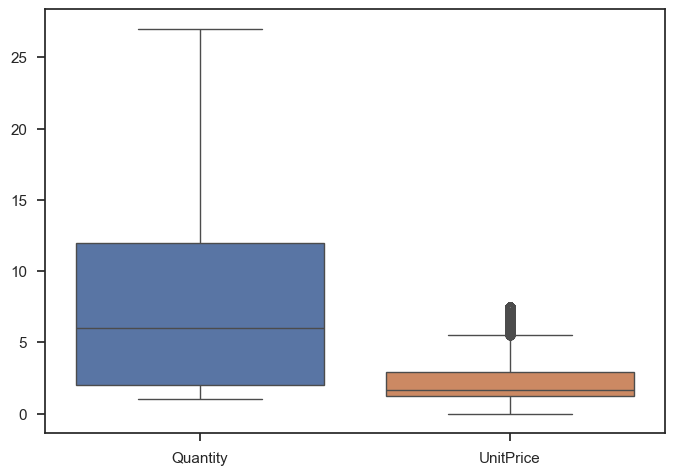

In [598]:
sns.boxplot(data=df_clean[['Quantity','UnitPrice']])

## Final DF

In [599]:
percentage_of_total=df_clean.shape[0]/df.shape[0]*100
print(f'It was possible to maintain {percentage_of_total :.1f}% of the raw data')

It was possible to maintain 62.4% of the raw data


# 4 - Modeling

## Feature Engineering

Total price = quantity * unitprice

In [600]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [601]:
df_clean['total_price'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**RFM Dataset** <br>
We are going to build a dataset of the customers with:
- (R) Recency: Time in days since customer's last purchase
- (F) Frequency: Number of times the customer has made a purchase
- (A) Average Ticket: Average value that the customer spends per purchase

In [602]:
df_clean['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

The most recent date in the data is December 2011. To ensure that the Recency values ​​are not inconsistent, we will use the current date for January 2012 as 2012-01-01.

In [603]:
today = pd.Timestamp('2012-01-01')
today

Timestamp('2012-01-01 00:00:00')

In [604]:
rfa = df_clean.groupby('CustomerID').agg(
    R= ('InvoiceDate', lambda x: (today - x.max()).days),
    F= ('InvoiceNo','nunique'),
    A= ('total_price',lambda x: round(x.mean(), 2))
).reset_index()

df_rfa = rfa.set_index('CustomerID')
df_rfa

,R,F,A
CustomerID,,,
12347,24,7,19.97
12348,270,3,15.03
12349,40,1,17.23
12350,332,1,18.40
12352,58,7,17.14
...,...,...,...
18280,299,1,17.12
18281,202,1,9.38
18282,29,2,14.14


## Data Normalization

KMeans is sensitive to the scale of the data. Therefore, it is essential to scale the features so that they have a mean of 0 and a standard deviation of 1.

In [605]:
scaler = StandardScaler()
numerical_columns = ['R','F','A']
original_index = df_rfa.index
scaler.fit(df_rfa[numerical_columns])

StandardScaler()

In [606]:
preprocessor = ColumnTransformer(
    transformers=[
    ('Normalize_data', scaler, numerical_columns)],
    remainder='drop'
)

In [607]:
rfa_normalized = preprocessor.fit_transform(df_rfa)
rfa_normalized = pd.DataFrame(rfa_normalized, columns=numerical_columns)
rfa_normalized.index = original_index
rfa_normalized

,R,F,A
CustomerID,,,
12347,-0.901064,0.425524,0.275127
12348,1.561499,-0.144653,-0.149991
12349,-0.740898,-0.429742,0.039332
12350,2.182145,-0.429742,0.140018
12352,-0.560710,0.425524,0.031587
...,...,...,...
18280,1.851801,-0.429742,0.029866
18281,0.880790,-0.429742,-0.636209
18282,-0.851012,-0.287198,-0.226581


<Axes: >

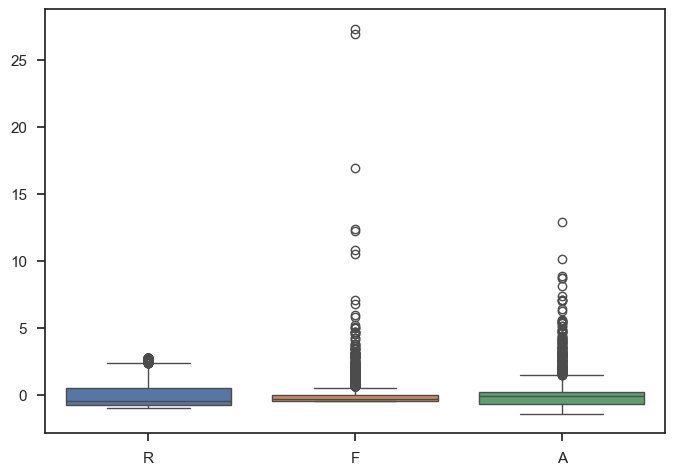

In [608]:
sns.boxplot(data=rfa_normalized)

## Removing Outlierds

In [609]:
rfa_filtered = remove_outliers_iqr(rfa_normalized, ['R','F','A'])

<Axes: >

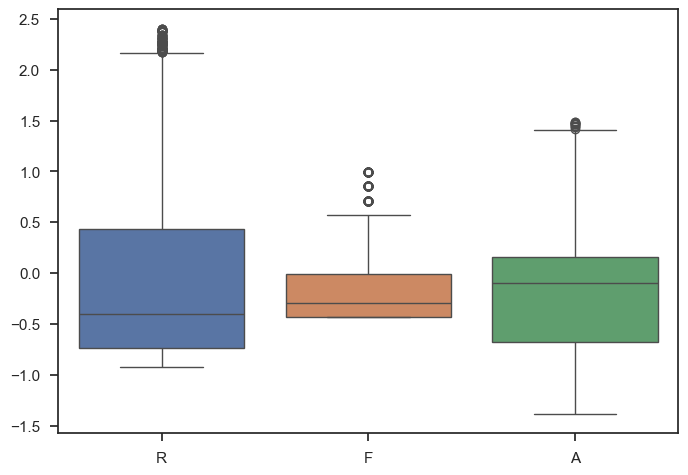

In [610]:
sns.boxplot(data=rfa_filtered)

## Defining number of clusters

### Elbow Method

This method helps to identify the point where increasing the number of clusters does not result in a significant reduction in inertia.

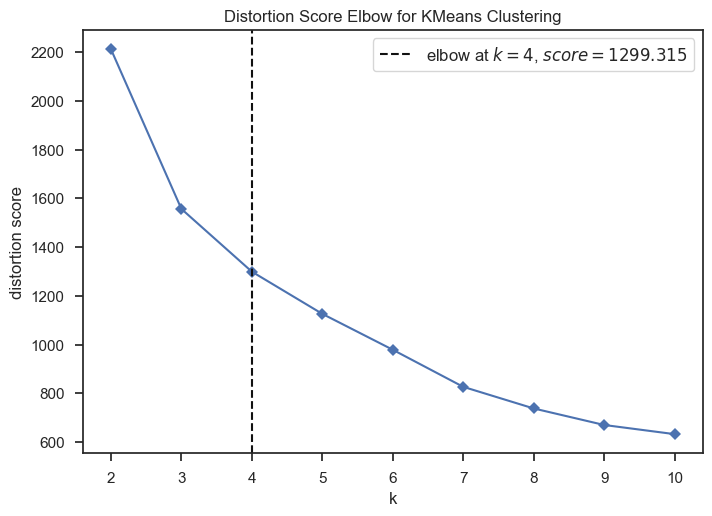

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [611]:
kelbow_visualizer(KMeans(), rfa_filtered, k=10, timings=False)

The best k acording this method is k=4.

### Silhouete Score, Davies-Bouldin Score and Calinski-Harabasz Score

k=2: Silhouette=0.5008, Davies-Bouldin=0.7894, Calinski-Harabasz=3875.0820
k=3: Silhouette=0.3884, Davies-Bouldin=0.9229, Calinski-Harabasz=3515.0425
k=4: Silhouette=0.3565, Davies-Bouldin=1.0010, Calinski-Harabasz=3045.1491
k=5: Silhouette=0.3525, Davies-Bouldin=0.9257, Calinski-Harabasz=2706.3007
k=6: Silhouette=0.3351, Davies-Bouldin=1.0245, Calinski-Harabasz=2657.6948
k=7: Silhouette=0.3529, Davies-Bouldin=0.9429, Calinski-Harabasz=2735.3838
k=8: Silhouette=0.3419, Davies-Bouldin=0.9631, Calinski-Harabasz=2646.5205
k=9: Silhouette=0.3323, Davies-Bouldin=0.9535, Calinski-Harabasz=2634.3889


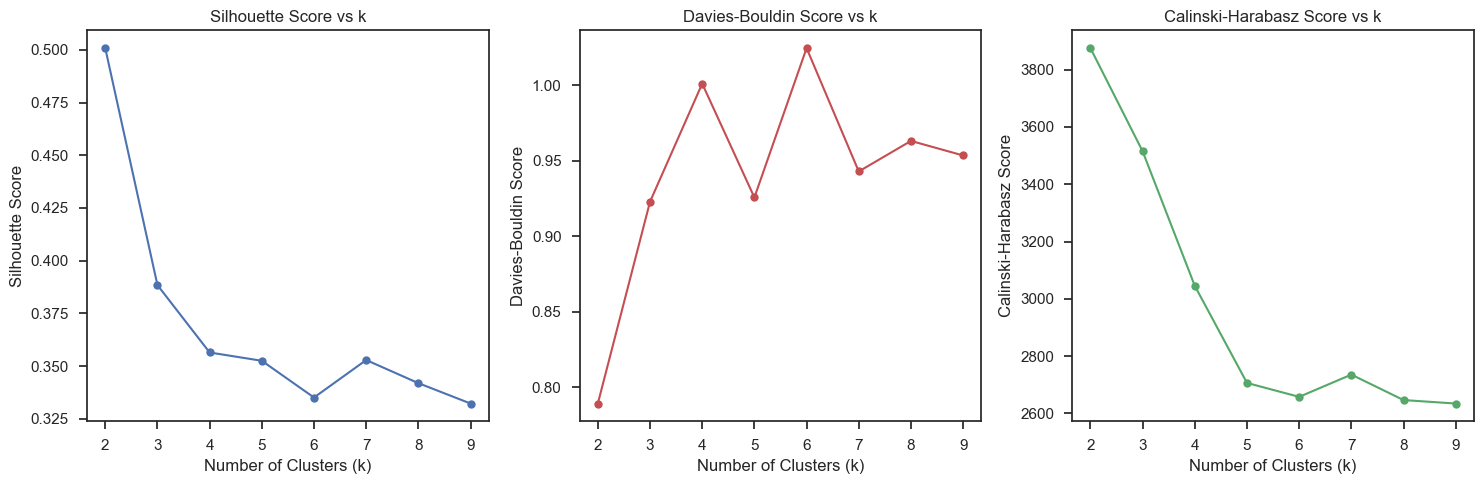

In [612]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfa_filtered)
    
    sil_score = silhouette_score(rfa_filtered, labels)
    db_score = davies_bouldin_score(rfa_filtered, labels)
    ch_score = calinski_harabasz_score(rfa_filtered, labels)
    
    silhouette_scores.append(sil_score)
    davies_bouldin_scores.append(db_score)
    calinski_harabasz_scores.append(ch_score)
    
    print(f'k={k}: Silhouette={sil_score:.4f}, Davies-Bouldin={db_score:.4f}, Calinski-Harabasz={ch_score:.4f}')

# Plotando as métricas
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.subplot(1,3,2)
plt.plot(k_values, davies_bouldin_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs k')

plt.subplot(1,3,3)
plt.plot(k_values, calinski_harabasz_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs k')

plt.tight_layout()
plt.show()


## Kmeans (k=4)

In [613]:
features = rfa_filtered[['R','F','A']]

In [614]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfa_filtered['Cluster'] = kmeans.fit_predict(rfa_filtered)

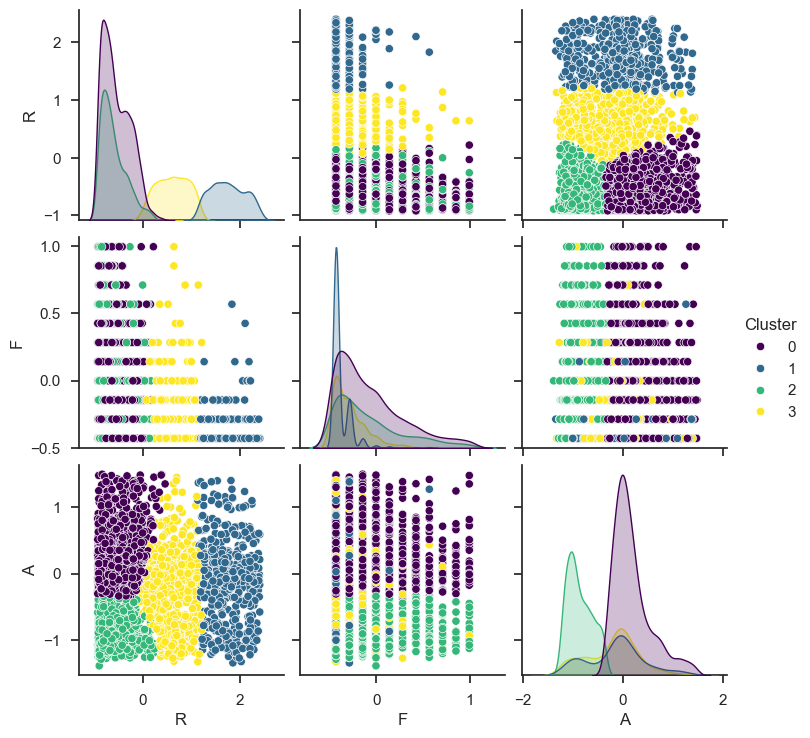

In [615]:
sns.pairplot(rfa_filtered, vars=features, hue='Cluster', palette='viridis')
plt.show()

In [616]:
cluster_profile = rfa_filtered.groupby('Cluster')[['R','F','A']].mean()
cluster_profile

,R,F,A
Cluster,,,
0,-0.542217,-0.065539,0.181767
1,1.744755,-0.381954,-0.132795
2,-0.599648,-0.078888,-0.862048
3,0.606908,-0.275421,-0.204341


In [617]:
# Inverting for original Scale
rfa_final = scaler.inverse_transform(rfa_filtered[numerical_columns])
rfa_final = pd.DataFrame(rfa_final, columns=numerical_columns, index=rfa_filtered.index)
rfa_final['Cluster'] = rfa_filtered['Cluster']

In [618]:
rfa_final.head()

,R,F,A,Cluster
CustomerID,,,,
12347,24.0,7.0,19.97,0
12348,270.0,3.0,15.03,1
12349,40.0,1.0,17.23,0
12350,332.0,1.0,18.40,1
12352,58.0,7.0,17.14,0


In [638]:
cluster_profile = rfa_final.groupby('Cluster')[['R','F','A']].mean()
cluster_profile

,R,F,A
Cluster,,,
0,59.847416,3.555015,18.885131
1,288.306513,1.335249,15.229828
2,54.110227,3.461364,6.755682
3,174.640275,2.082616,14.398434


# 5 - Evaluation

In [653]:
print(f"Inércia: {kmeans.inertia_}")
print(f"Coeficiente de Silhueta: {silhouette_score(rfa_final, kmeans.labels_)}")

Inércia: 1299.5582651180532
Coeficiente de Silhueta: 0.2205549860281402


In [621]:
fig = px.scatter_3d(rfa_final, x='R', y='F', z='A', color='Cluster')
fig.show()

### Centers Evaluation

In [634]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=rfa_normalized.columns)

In [623]:
centers

,R,F,A
0,-0.542217,-0.065539,0.181767
1,1.745894,-0.381862,-0.133328
2,-0.598616,-0.079125,-0.862338
3,0.608355,-0.275666,-0.202167


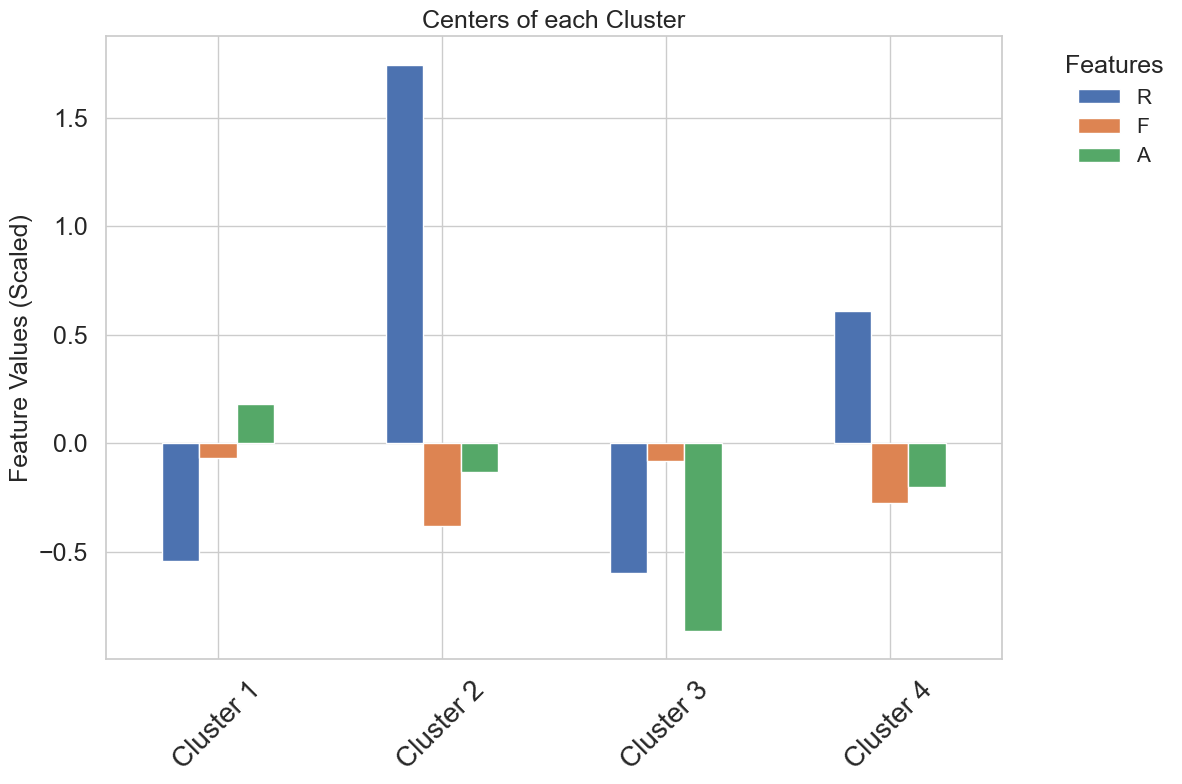

In [692]:
centers.index = [f'Cluster {i+1}' for i in range(len(centers))]

centers.plot(kind='bar', figsize=(12, 8))
plt.title('Centers of each Cluster',fontsize=18)
plt.ylabel('Feature Values (Scaled)',fontsize=18)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=18)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=18)
plt.tight_layout()
plt.show()


# 6 - Deployment

## Conclusion

***Cluster 1*** <br>
Recent customers with average purchase frequency and high average ticket. They represent a valuable group that has already demonstrated a good level of engagement and spending.

*Recency (R)*: Customers who have purchased recently (more engaged).

*Frequency (F)*: Average purchase frequency.

*Average Ticket (A)*: Spend more than average.

**Strategic Actions**:

    1.Loyalty Programs: Encourage repeat purchases to increase frequency.
Implementation: Offer loyalty points, rewards for recurring purchases, or exclusive discounts for program members.

    2.Cross-Selling and Upselling:Increase the value of purchases.
Implementation: Suggest complementary or higher-value products during the purchase process.
    
    3.Engagement Campaigns:Maintain interest and increase loyalty.
Implementation: Send personalized newsletters, invitations to exclusive events, or previews of new products.
____________________________________________

**Cluster 2**<br>
Inactive customers with low purchase frequency and low average ticket. This group is distant from recent purchases and tends to spend little.


*Recency (R)*: Customers who have not purchased for a long time (less engaged).

*Frequency (F)*: Low purchase frequency.

*Average Ticket (A)*: Spend less than average.

**Strategic Actions**:

    1.Reactivation Campaigns:Encourage these customers to make new purchases.
Implementation: Send emails with exclusive offers, discount coupons, or "come back to receive something free" campaigns.

    2.Personalization of Offers:Make offers more relevant to increase interest.
Implementation: Use historical data to recommend products that these customers are likely to be interested in.

    3.Feedback and Satisfaction Surveys:Understand why these customers are inactive.
Implementation: Send surveys to collect feedback and identify possible improvements in products or services.
______________________________
**Cluster 3**<br>
Recent customers with average purchase frequency but very low average ticket. They represent a group that is engaged but not spending much.

*Recency (R)*: Customers who have purchased recently (more engaged).

*Frequency (F)*: Average purchase frequency.

*Average Ticket (A)*: Spend significantly less than average.

**Strategic Actions**:

    1.Upselling and Cross-Selling:Increase the value of purchases.
Implementation: Offer higher-value or complementary products that add more value to current purchases.

    2.Incentives to Increase Spending: Motivate these customers to spend more with each purchase.
Implementation: Offer progressive discounts (e.g., 10% off on purchases above X) or freebies for higher-value purchases.

    3.Value-Focused Loyalty Programs: Reward customers who spend more.
Implementation: Create loyalty tiers where benefits increase with the total accumulated spending.
_________________________________
**Cluster 4**<br>
Customers who have been inactive for some time with low purchase frequency and low average ticket. This group is slightly distant from recent purchases and tends to spend little.

*Recency (R)*: Customers who have not purchased for some time (less engaged).

*Frequency (F)*: Low purchase frequency.

*Average Ticket (A)*: Spend less than average.

**Strategic Actions**:

    1.Reengagement Campaigns:Bring these customers back into the purchasing cycle.
Implementation: Send personalized communications with special offers, product news, or exclusive events.

    2.Potential Value Segmentation: Identify if there are subgroups within this cluster with higher recovery potential.
Implementation: Analyze historical behavior to further segment and personalize actions.

    3.Improvement of Customer Experience: Increase satisfaction and the likelihood of future purchases.
Implementation: Offer enhanced customer support, website navigation improvements, or simplified purchase processes.


In [665]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [677]:
data = {
    'Cluster': ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4'],
    'Recency': ['Recent customers','Inactive customers','Recent customers','Somewhat inactive customers'],
    'Frequency': ['Average frequency','Low frequency','Average frequency','Low frequency'],
    'Average Ticket': ['High ticket','Low ticket','Very low ticket','Low ticket'],
    'Strategic Actions': [
        [
            "Loyalty Programs",
            "Cross-Selling and Upselling",
            "Engagement Campaigns"
        ],
        [
            "Reactivation Campaigns",
            "Personalization of Offers",
            "Feedback and Satisfaction Surveys"
        ],
        [
            "Upselling and Cross-Selling",
            "Incentives to Increase Spending",
            "Value-Focused Loyalty Programs"
        ],
        [
            "Reengagement Campaigns",
            "Potential Value Segmentation",
            "Improvement of Customer Experience"
        ]
    ]
}

df_strategies = pd.DataFrame(data)
df_strategies

,Cluster,Recency,Frequency,Average Ticket,Strategic Actions
0,Cluster_1,Recent customers,Average frequency,High ticket,"[Loyalty Programs, Cross-Selling and Upselling, Engagement Campaigns]"
1,Cluster_2,Inactive customers,Low frequency,Low ticket,"[Reactivation Campaigns, Personalization of Offers, Feedback and Satisfaction Surveys]"
2,Cluster_3,Recent customers,Average frequency,Very low ticket,"[Upselling and Cross-Selling, Incentives to Increase Spending, Value-Focused Loyalty Programs]"
3,Cluster_4,Somewhat inactive customers,Low frequency,Low ticket,"[Reengagement Campaigns, Potential Value Segmentation, Improvement of Customer Experience]"
